In [46]:
from sklearn.datasets import make_blobs, make_moons
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
 
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

Ex.2 Please call make_blob and generate a dataset with 120 samples, 2 features, 4 centres (clusters), and cluster_std=0.40.

In [47]:
X,y=make_blobs(n_samples=120,n_features=2,centers=4,cluster_std=0.4)

In [48]:
print(X.shape)
print(y.shape)

(120, 2)
(120,)


Text(0.5, 1.0, 'Clusters')

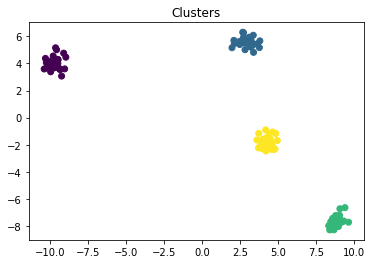

In [49]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('Clusters')

Ex.5 Run the implemented KMeans function K-Means, fit the model and predict the outcome

In [50]:
from sklearn.cluster import KMeans

km =KMeans(n_clusters=4)

y_pred=km.fit_predict(X)

Text(0.5, 1.0, 'Clusters after prediction')

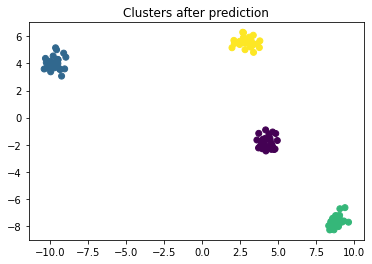

In [51]:
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.title('Clusters after prediction')

Ex.7 Calculate inertia Inertia_.


In [52]:
print(f'Interia_ : {km.inertia_}')

Interia_ : 36.86249768818019


K-means clustering


In [53]:
X,y=make_blobs(n_samples=120,n_features=2,centers=5,cluster_std=0.8)


Ex.1 Plot the data

(120, 2)
(120,)


Text(0.5, 1.0, 'Clusters')

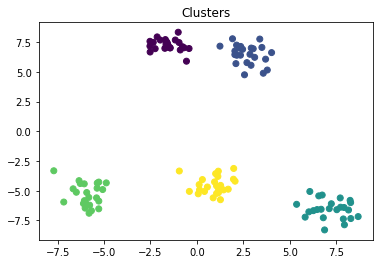

In [54]:
print(X.shape)
print(y.shape)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('Clusters')

Ex.2 Predict for the same nb. of clusters = 5.


Interia_ : 131.29407277102914


Text(0.5, 1.0, 'Clusters after prediction')

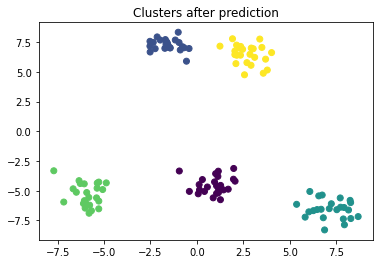

In [55]:
km =KMeans(n_clusters=5)
y_pred1=km.fit_predict(X)
print(f'Interia_ : {km.inertia_}')
plt.scatter(X[:,0],X[:,1],c=y_pred1)
plt.title('Clusters after prediction')

Ex.3 Predict for 2 instead of 5 clusters.

Interia_ : 2466.310143797319


Text(0.5, 1.0, 'Clusters after prediction')

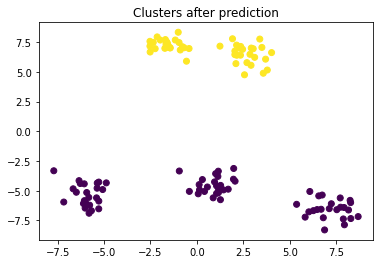

In [56]:
km =KMeans(n_clusters=2)
y_pred2=km.fit_predict(X)
print(f'Interia_ : {km.inertia_}')
plt.scatter(X[:,0],X[:,1],c=y_pred2)
plt.title('Clusters after prediction')

K-means c++


Ex.1 Run K-Means for the previous ex. while changing the parameter in KMeans function: init='k-means++'

Interia_ : 131.29407277102914


Text(0.5, 1.0, 'Clusters after prediction')

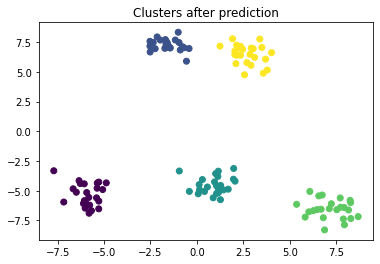

In [57]:
km =KMeans(n_clusters=5,init='k-means++')
y_pred1 = km.fit_predict(X)
print(f'Interia_ : {km.inertia_}')
plt.scatter(X[:,0],X[:,1],c=y_pred1)
plt.title('Clusters after prediction')

Interia_ : 2466.310143797319


Text(0.5, 1.0, 'Clusters after prediction')

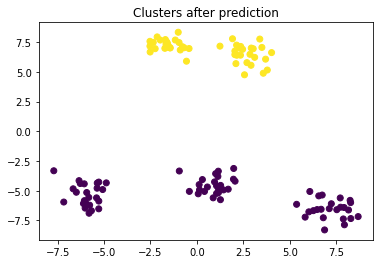

In [58]:
km =KMeans(n_clusters=2,init='k-means++')
y_pred2=km.fit_predict(X)
print(f'Interia_ : {km.inertia_}')
plt.scatter(X[:,0],X[:,1],c=y_pred2)
plt.title('Clusters after prediction')

Elbow method

Ex.1 Run K-Means for a range of clusters using a for loop and collecting the distortions (inertia) into a list

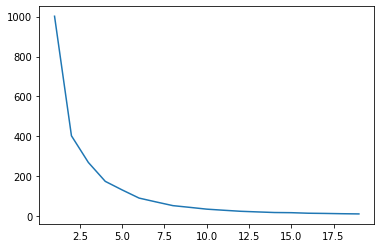

In [59]:
interia_list=[]
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

for nr in range(1,20):
    km =KMeans(n_clusters=nr,init='random')
    km.fit_predict(x)
    interia_list.append(km.inertia_)

plt.plot([i for i in range(1,20)],interia_list)

Ex.2 Plot the distortions of K-Means.

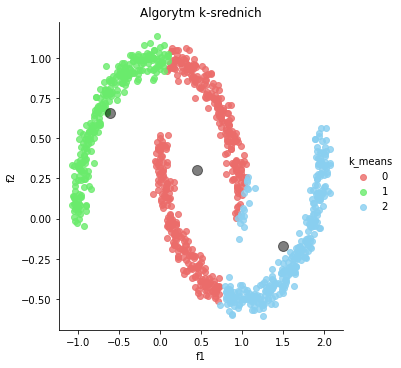

In [60]:
import seaborn as sns
km =KMeans(n_clusters=3,init='random')
y_km=km.fit_predict(x)
X_moon['k_means'] = y_km
centers=km.cluster_centers_
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c','#89cff0']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()